<a href="https://colab.research.google.com/github/SwanandKale/AIML_Bootcamp/blob/main/Exploring_Employee_Study_Hrs_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 1: Load the data set

In [ ]:
dataset='/content/drive/MyDrive/ALML DataSets/Employee_StudyHours.csv'
import pandas as pd
df=pd.read_csv(dataset) #df=dataframe -terminology

In [ ]:
df.head(5)

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   30 non-null     float64
 1   Scores  30 non-null     float64
dtypes: float64(2)
memory usage: 640.0 bytes


step 2 : Visualization of data

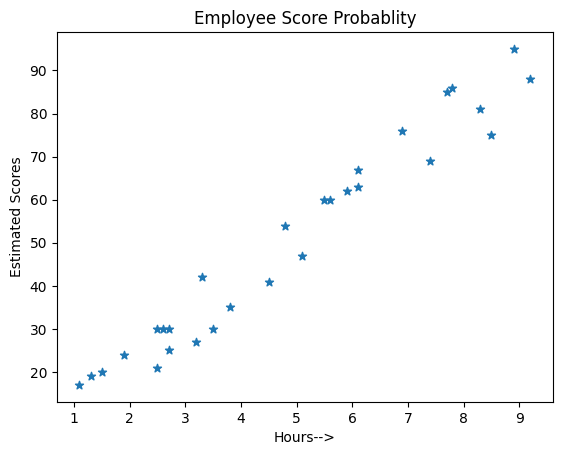

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Hours,df['Scores'],marker='*')
plt.xlabel("Hours-->")
plt.ylabel("Estimated Scores")
plt.title("Employee Score Probablity")

plt.show()


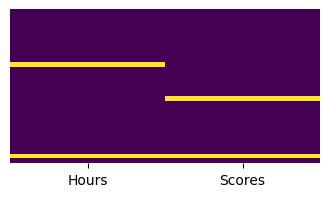

In [ ]:
import seaborn as sns

def get_heatmap(df):
  plt.figure(figsize=(4,2))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()

get_heatmap(df)

step 3 : Preprocessing the dataset

In [ ]:
#treating missing values
"""df.dropna()"""

median_v=df.Hours.median()
mean_v=df.Scores.mean()
print('Hours_Median',median_v,'Scores_Mean',mean_v)

df.Hours.fillna(median_v)

Hours_Median 4.65 Scores_Mean 51.46666666666667


0     2.50
1     5.10
2     3.20
3     8.50
4     3.50
5     1.50
6     9.20
7     5.50
8     8.30
9     2.70
10    7.70
11    4.65
12    5.90
13    4.50
14    3.30
15    1.10
16    8.90
17    2.50
18    3.40
19    1.90
20    6.10
21    7.40
22    2.70
23    4.80
24    3.80
25    6.90
26    7.80
27    1.30
28    2.60
29    6.10
30    4.65
31    5.60
Name: Hours, dtype: float64

0     2.50
1     5.10
2     3.20
3     8.50
4     3.50
5     1.50
6     9.20
7     5.50
8     8.30
9     2.70
10    7.70
11    4.65
12    5.90
13    4.50
14    3.30
15    1.10
16    8.90
17    2.50
18    3.40
19    1.90
20    6.10
21    7.40
22    2.70
23    4.80
24    3.80
25    6.90
26    7.80
27    1.30
28    2.60
29    6.10
30    4.65
31    5.60
Name: Hours, dtype: float64

In [ ]:
df['Hours']

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    NaN
12    5.9
13    4.5
14    3.3
15    1.1
16    8.9
17    2.5
18    3.4
19    1.9
20    6.1
21    7.4
22    2.7
23    4.8
24    3.8
25    6.9
26    7.8
27    1.3
28    2.6
29    6.1
30    NaN
31    5.6
Name: Hours, dtype: float64

In [ ]:
df['Hours']=df.Hours.fillna(median_v)

import math
df['Scores']=df.Scores.fillna(math.floor(df.Scores.mean()))

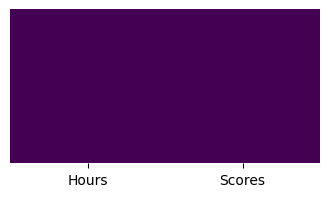

In [ ]:
import seaborn as sns

def get_heatmap(df):
  plt.figure(figsize=(4,2))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()

get_heatmap(df)

Loading the data
#x -> independent var
#y dependent var

In [ ]:
df.head()

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [ ]:
import pandas as pd
X=df.iloc[:,1:2]
Y=df.iloc[:,-1:]

In [ ]:
print(X)
print(Y)

    Scores
0     21.0
1     47.0
2     27.0
3     75.0
4     30.0
5     20.0
6     88.0
7     60.0
8     81.0
9     25.0
10    85.0
11    85.0
12    62.0
13    41.0
14    42.0
15    17.0
16    95.0
17    30.0
18    51.0
19    24.0
20    67.0
21    69.0
22    30.0
23    54.0
24    35.0
25    76.0
26    86.0
27    19.0
28    30.0
29    63.0
30    51.0
31    60.0
    Scores
0     21.0
1     47.0
2     27.0
3     75.0
4     30.0
5     20.0
6     88.0
7     60.0
8     81.0
9     25.0
10    85.0
11    85.0
12    62.0
13    41.0
14    42.0
15    17.0
16    95.0
17    30.0
18    51.0
19    24.0
20    67.0
21    69.0
22    30.0
23    54.0
24    35.0
25    76.0
26    86.0
27    19.0
28    30.0
29    63.0
30    51.0
31    60.0


For ml model we can only feed data in form of ARRAYS and the array should be 2D

In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,:-1].values

X

In [ ]:
#method 2
import numpy as np
X=np.array(df[['Hours']])
X


In [ ]:
Y=np.array(df[['Scores']])
Y

step 5 : Splitting Data


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

array([[2.5 ],
       [6.9 ],
       [4.5 ],
       [4.8 ],
       [1.9 ],
       [8.5 ],
       [5.9 ],
       [8.9 ],
       [6.1 ],
       [1.5 ],
       [3.4 ],
       [5.6 ],
       [7.7 ],
       [3.8 ],
       [6.1 ],
       [2.7 ],
       [7.8 ],
       [4.65],
       [1.3 ],
       [2.6 ],
       [8.3 ],
       [3.3 ],
       [5.5 ],
       [1.1 ],
       [4.65]])

In [ ]:
Y_train

array([[30.],
       [76.],
       [41.],
       [54.],
       [24.],
       [75.],
       [62.],
       [95.],
       [63.],
       [20.],
       [51.],
       [60.],
       [85.],
       [35.],
       [67.],
       [25.],
       [86.],
       [85.],
       [19.],
       [30.],
       [81.],
       [42.],
       [60.],
       [17.],
       [51.]])

Train the model : Feeding the model

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,Y_train)



LinearRegression()

Testing the model

In [ ]:
y_pred=model.predict(X_test)

step 8 performance evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_pred)

In [ ]:
print("Mean Squared Error : ",mse)

Mean Squared Error :  83.70927282966866


In [ ]:
model.score(X_test,Y_test)*100

84.4889034614515

In [ ]:
model.score(X_train,Y_train)*100

87.44861609540625

In [ ]:
model.score(X,Y)*100

87.12543691941008

In [ ]:
model.coef_

array([[9.50559392]])

In [ ]:
model.intercept_

array([7.73314921])

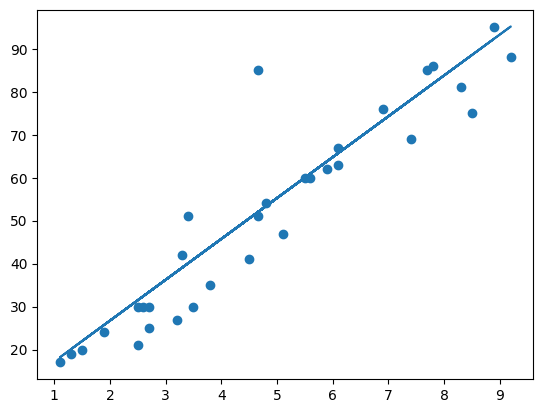

In [ ]:
y_pred=model.coef_*X+model.intercept_

#plotting data

plt.scatter(X,Y)
plt.plot(X,y_pred)